 문제 정의:저는 대한민국의 지역별 범죄율 패턴을 분석하고자 합니다. 이를 통해 각 지역의 범죄 유형에 대한 특성을 파악하고, 지역 간 범죄 패턴의 유사성 또는 차이점을 확인하여 범죄 예방 및 대응에 도움이 될 수 있는 데이터를 얻을려고 합니다

데이터 선택:
제가 선택한 데이터셋은 대한민국 경찰청이 제공하는 범죄 통계 데이터입니다. 이 데이터는 지역별로 다양한 범죄 유형에 대한 발생 건수를 포함하고 있습니다. 이 데이터를 사용하여 각 지역의 범죄 패턴을 분석하고 지역 간의 유사성을 확인할 것 입니다.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [154]:
# 데이터 불러오기
crime_data = pd.read_csv('crime.CSV', encoding='cp949')
crime_data.head()


,place,Murder,Attempted murder,Robbery,Rape,Attempted rape,Sexual assault,Other sexual offenses,Arson,Theft,...,Special economic crimes,Drug offenses,Health-related crimes,Environmental crimes,Traffic offenses,Labor crimes,Security crimes,Election crimes,Military service crimes,Other crimes
0,Seoul,35,68,118,1200,219,4358,35,217,37594,...,10374,2821,4260,50,32013,83,61,552,935,48367
1,Busan,29,24,43,347,83,1064,14,89,13699,...,3996,856,2581,243,12176,37,13,138,164,24440
2,Daegu,16,15,31,215,43,648,9,50,9792,...,1917,306,777,16,12610,19,6,128,207,8821
3,Incheon,14,38,30,340,61,1030,16,70,8895,...,3025,1062,1048,87,11926,14,7,104,400,17865
4,Gwangju,1,2,10,152,32,391,8,35,5204,...,1332,129,431,7,7827,9,4,104,109,5177


In [155]:
# 모든 범죄 유형 데이터
columns = ['place', 'Murder', 'Attempted murder', 'Robbery', 'Rape', 'Attempted rape', 'Sexual assault', 'Other sexual offenses', 'Arson', 'Theft', 'Assault', 'Battery',
 'False imprisonment', 'Blackmail', 'Drugging', 'Other violent acts', 'Coercion', 'Hostile behavior', 'Destruction', 'Dereliction of duty', 'Abuse of authority', 'Bribery', 'Forgery',
'Counterfeiting', 'Document forgery', 'Securities fraud', 'Embezzlement', 'Sex crimes', 'Gambling offenses', 'Special economic crimes', 'Drug offenses', 'Health-related crimes', 'Environmental crimes',
'Traffic offenses', 'Labor crimes', 'Security crimes', 'Election crimes', 'Military service crimes', 'Other crimes']

In [156]:
# 각 범죄 유형에 대한 발생 건수를 지역별로 추출
crime_type_counts = crime_data.iloc[:, 1:]

In [157]:
# 결측치 처리
crime_data.dropna(inplace=True)

# 자치구 열을 인덱스로 설정
crime_data.set_index('place', inplace=True)

In [158]:
# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data)

# K-means 클러스터링 적용
k_values = range(2, 11)  # 클러스터 개수 범위 설정
wcss = []  # Within-Cluster Sum of Squares 저장할 리스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


In [159]:
# '지역별 범죄 유형' 변수 선택
selected_features = crime_data['Murder']

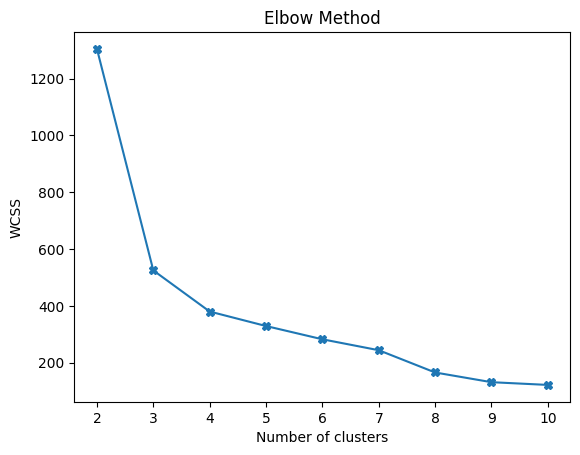

In [160]:
# 엘보우 방법을 통한 최적의 K 결정
plt.plot(k_values, wcss, marker='X')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
# 최적의 K 선택
optimal_k = 2
#기울기의 변화가 가장 크게 감소하는 지점을 찾아냅니다. 저는 2에서 제일 크게 감소 했다 생각하여 3으로 선택했습니다
# 선택된 K로 K-means 알고리즘 초기화 및 클러스터링 수행
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=2, random_state=42)

In [162]:
# 클러스터 분석
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # 클러스터 중심점 스케일 역변환
cluster_labels = kmeans.labels_  # 각 데이터 포인트의 클러스터 레이블

In [163]:
# 각 클러스터의 특성 설명
for i in range(optimal_k):
    print(f"Cluster {i+1}:")
    print(f"Center: {cluster_centers[i]}")
    print(f"Number of instances: {np.sum(cluster_labels == i)}")
    print("")

Cluster 1:
Center: [2.12195122e+00 3.08536585e+00 3.60975610e+00 3.88658537e+01
 6.45121951e+00 1.04219512e+02 1.65853659e+00 9.06097561e+00
 1.37298780e+03 2.04902439e+02 9.32158537e+02 8.21951220e+00
 1.60548780e+02 1.91463415e+00 5.17195122e+01 4.79390244e+01
 4.39853659e+02 9.37804878e+00 1.19512195e+01 2.06097561e+00
 2.51219512e+00 7.65731707e+01 2.80487805e-01 2.30279268e+03
 3.91890244e+02 2.34024390e+01 1.59560976e+02 3.53048780e+01
 3.26036585e+02 5.51341463e+01 1.08487805e+02 3.01707317e+01
 2.00606098e+03 6.52439024e+00 1.42682927e+00 1.93902439e+01
 3.19756098e+01 1.77619512e+03]
Number of instances: 82

Cluster 2:
Center: [2.60000000e+01 4.33333333e+01 6.36666667e+01 6.29000000e+02
 1.21000000e+02 2.15066667e+03 2.16666667e+01 1.25333333e+02
 2.00626667e+04 2.45866667e+03 1.43410000e+04 1.36333333e+02
 2.32500000e+03 3.56666667e+01 7.16000000e+02 7.16666667e+02
 5.68633333e+03 1.92666667e+02 2.08666667e+02 3.63333333e+01
 7.36666667e+01 1.17033333e+03 1.06666667e+01 3.184

In [164]:
new_k = 3

# K-means 클러스터링 다시 수행
new_kmeans = KMeans(n_clusters=new_k, random_state=42)
new_kmeans.fit(scaled_data)
new_cluster_centers = scaler.inverse_transform(new_kmeans.cluster_centers_)
new_cluster_labels = new_kmeans.labels_


In [165]:

#선택한 데이터셋의 구조와 해당 데이터가 문제 해결에 어떻게 도움이 될 수 있는지 설명:

#이 데이터셋은 다양한 범죄 유형에 대한 발생 건수를 기록한 표 형식의 데이터입니다.
#각 행은 지역을 나타내며, 열은 각각 다른 범죄 유형을 나타냅니다. 
#이러한 데이터셋을 사용하여 지역 간의 범죄 유형 패턴을 비교하고 클러스터링할 수 있습니다. 
#각 클러스터는 유사한 범죄 유형 패턴을 가진 지역들을 그룹화할 것입니다.

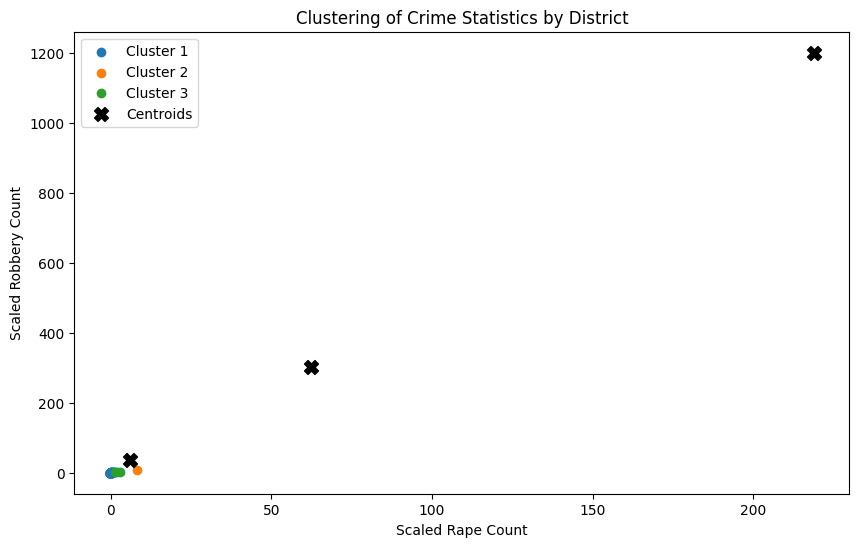

In [166]:
# 클러스터를 시각화하여 각 클러스터가 어떻게 구성되어 있는지 산점도 작성
plt.figure(figsize=(10, 6))
for i in range(new_k):
    cluster_data = scaled_data[new_cluster_labels == i]
    plt.scatter(cluster_data[:, columns.index('Rape')], cluster_data[:, columns.index('Robbery')], label=f'Cluster {i+1}')
plt.scatter(new_cluster_centers[:, columns.index('Rape')], new_cluster_centers[:, columns.index('Robbery')], color='black', marker='X', s=100, label='Centroids')
plt.title('Clustering of Crime Statistics by District')
plt.xlabel('Scaled Rape Count')
plt.ylabel('Scaled Robbery Count')  
plt.legend()
plt.show()


In [167]:
# 평가: 실루엣 점수 계산 및 해석
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8596243278830132


In [168]:
# 실루엣 점수가 0.85점 으로 클러스터링 알고리즘이 데이터를 효과적으로 분리하고, 각 클러스터가 의미 있는 패턴을 가지고 있다고 판단할 수 있습니다.